In [2]:
from google.colab import files
uploaded=files.upload()

Saving bbmp-street-dogs-survey-2023.csv to bbmp-street-dogs-survey-2023.csv


In [20]:
import pandas as pd
data=pd.read_csv("bbmp-street-dogs-survey-2023.csv")
data

,BBMP Zone,Population,95% Confidence Interval (CI),Male,Female,Unknown,Neutered (%),Area,Dogs per sq. km
0,East,37685,36993-38377,21584,11228,4873,71.75,90.57,416.09
1,West,22025,21493-22557,13870,6261,1894,79.48,50.10,439.62
2,South,23241,22692-23790,13116,7066,3059,77.32,61.08,380.50
3,Dasarahalli,21221,20700-21742,14580,4850,1791,77.46,27.83,762.52
4,RR Nagar,41266,40541-41991,24638,11899,4729,67.64,115.40,357.59
5,Bommanahalli,39183,38475-39891,23860,9299,6024,72.18,99.34,394.43
6,Yalahanka,36343,35679-37007,21165,13282,1896,66.50,98.52,368.89
7,Mahadevapura,58341,57513-59229,32528,18872,6971,59.34,169.71,343.77
8,TOTAL,279335,277450-281220,165341,82757,31237,71.81,712.55,392.02


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   BBMP Zone                     9 non-null      object 
 1   Population                    9 non-null      int64  
 2   95% Confidence Interval (CI)  9 non-null      object 
 3   Male                          9 non-null      int64  
 4   Female                        9 non-null      int64  
 5   Unknown                       9 non-null      int64  
 6   Neutered (%)                  9 non-null      float64
 7   Area                          9 non-null      float64
 8   Dogs per sq. km               9 non-null      float64
dtypes: float64(3), int64(4), object(2)
memory usage: 776.0+ bytes


In [12]:
data.describe()

,Population,Male,Female,Unknown,Neutered (%),Area,Dogs per sq. km
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,62071.111111,36742.444444,18390.444444,6941.555556,71.497778,158.344444,428.381111
std,82318.776458,48622.000849,24505.574616,9306.070789,6.338972,211.831984,128.648360
min,21221.000000,13116.000000,4850.000000,1791.000000,59.340000,27.830000,343.770000
25%,23241.000000,14580.000000,7066.000000,1896.000000,67.640000,61.080000,368.890000
50%,37685.000000,21584.000000,11228.000000,4729.000000,71.810000,98.520000,392.020000
75%,41266.000000,24638.000000,13282.000000,6024.000000,77.320000,115.400000,416.090000
max,279335.000000,165341.000000,82757.000000,31237.000000,79.480000,712.550000,762.520000


In [13]:
data.isnull().sum()

BBMP Zone                       0
Population                      0
95% Confidence Interval (CI)    0
Male                            0
Female                          0
Unknown                         0
Neutered (%)                    0
Area                            0
Dogs per sq. km                 0
dtype: int64

In [14]:
data.shape

(9, 9)

PHASE 2:
Questions based on Statistical Analysis:

1.What is the average population of street dogs in each BBMP zone?

In [15]:
# Assuming your dataset has columns 'BBMPZone' and 'StreetDogPopulation'
# Group by BBMPZone and calculate the average population for each zone
average_population_by_zone = data.groupby('BBMP Zone')['Population'].mean()
# Print the results
print(average_population_by_zone)


BBMP Zone
Bommanahalli     39183.0
Dasarahalli      21221.0
East             37685.0
Mahadevapura     58341.0
RR Nagar         41266.0
South            23241.0
TOTAL           279335.0
West             22025.0
Yalahanka        36343.0
Name: Population, dtype: float64


2.Is there a significant difference in the population of male, female, and unknown street dogs across different BBMP zones?

In [18]:
import pandas as pd
from scipy.stats import kruskal

# Load your dataset
df = pd.read_csv("bbmp-street-dogs-survey-2023.csv")

# Perform Kruskal-Wallis test
result = kruskal(*[group['Population'].values for name, group in df.groupby('BBMP Zone')])

# Display the result
print("Kruskal-Wallis Test:")
print("H-statistic:", result.statistic)
print("P-value:", result.pvalue)

# Check for statistical significance
alpha = 0.05
if result.pvalue < alpha:
    print("There is a significant difference in populations.")
else:
    print("There is no significant difference in populations.")


Kruskal-Wallis Test:
H-statistic: 8.0
P-value: 0.43347012036670896
There is no significant difference in populations.


3.What is the overall neutering rate of street dogs in the dataset?

In [19]:
 # Assuming your dataset has columns 'TotalStreetDogs' and 'NeuteredDogs'
total_street_dogs = data['Population'].sum()
neutered_dogs = data['Neutered (%)'].sum()

# Calculate the overall neutering rate
neutering_rate = (neutered_dogs / total_street_dogs) * 100

# Print the result
print(f'Overall Neutering Rate: {neutering_rate:.2f}%')


Overall Neutering Rate: 0.12%


4. Is there a correlation between the area (in square kilometers) and the population density of street dogs?


In [22]:
import pandas as pd
from scipy.stats import pearsonr
# Assuming your dataset has columns 'AreaInSquareKm' and 'StreetDogPopulation'
area_in_square_km = data['Dogs per sq. km']
street_dog_population = data['Population']

# Drop NaN values if there are any
area_in_square_km = area_in_square_km.dropna()
street_dog_population = street_dog_population.dropna()

# Calculate the correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(area_in_square_km, street_dog_population)

# Print the results
print(f'Correlation Coefficient: {correlation_coefficient}')
print(f'P-value: {p_value}')

# Check for significance (assuming a significance level of 0.05)
if p_value < 0.05:
	print('There is a significant correlation between the area and population density of street dogs.')
else:
	print('There is no significant correlation between the area and population density of street dogs.')


Correlation Coefficient: -0.185839496341765
P-value: 0.63213814371721
There is no significant correlation between the area and population density of street dogs.


5.Are there any significant differences in the population density of street dogs across different BBMP zones?


In [23]:
import pandas as pd
from scipy.stats import f_oneway
# Assuming your dataset has columns 'BBMP Zone', 'Population', and 'Dogs per sq. km'
# Group the data by BBMP Zone and extract the population density for each zone
zones = data['BBMP Zone'].unique()
grouped_data = [data[data['BBMP Zone'] == zone]['Population'] / data[data['BBMP Zone'] == zone]['Dogs per sq. km'] for zone in zones]

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(*grouped_data)

# Print the results
print(f'F-statistic: {f_statistic}')
print(f'P-value: {p_value}')

# Check for significance (assuming a significance level of 0.05)
if p_value < 0.05:
	print('There are significant differences in the population density of street dogs across different BBMP zones.')
else:
	print('There are no significant differences in the population density of street dogs across different BBMP zones.')


F-statistic: nan
P-value: nan
There are no significant differences in the population density of street dogs across different BBMP zones.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4141: DegenerateDataWarning: all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.
  warnings.warn(stats.DegenerateDataWarning(msg))


6.What is the mean population of street dogs across all BBMP zones?

In [24]:
# Assuming your dataset has columns 'BBMPZone' and 'StreetDogPopulation'
mean_population = data['Population'].mean()

# Print the result
print(f'Mean Population of Street Dogs Across All BBMP Zones: {mean_population:.2f}')


Mean Population of Street Dogs Across All BBMP Zones: 62071.11


7.Can we identify any outliers in the population of street dogs within each BBMP zone?


In [25]:
# Assuming your dataset has columns 'BBMPZone' and 'StreetDogPopulation'
# Group the data by BBMPZone
grouped_data = data.groupby('BBMP Zone')['Population']

# Define a function to identify outliers using IQR
def identify_outliers(series):
  Q1 = series.quantile(0.25)
  Q3 = series.quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  return series[(series < lower_bound) | (series > upper_bound)]

# Identify outliers for each BBMPZone
outliers = grouped_data.apply(identify_outliers)

# Print the outliers
print("Outliers in Population of Street Dogs within Each BBMP Zone:")
print(outliers)


Outliers in Population of Street Dogs within Each BBMP Zone:
Series([], Name: Population, dtype: int64)


8. What is the median population of neutered street dogs in each BBMP zone?


In [27]:
# Assuming your dataset has columns 'BBMPZone', 'Neutered', and 'Population'
# Filter data for neutered street dogs
neutered_data = data[data['Neutered (%)'] == True]

# Calculate the median population of neutered street dogs for each BBMP zone
median_population_by_zone = neutered_data.groupby('BBMP Zone')['Population'].median()

# Print the results
print("Median Population of Neutered Street Dogs in Each BBMP Zone:")
print(median_population_by_zone)


Median Population of Neutered Street Dogs in Each BBMP Zone:
Series([], Name: Population, dtype: float64)


9.Is there a correlation between the population density of street dogs and the area (in square kilometers) they inhabit?

In [29]:
import pandas as pd
from scipy.stats import pearsonr
# Assuming your dataset has columns 'AreaInSquareKm' and 'Population'
area_in_square_km = data['Area']
population_density = data['Population']

# Drop NaN values if there are any
area_in_square_km = area_in_square_km.dropna()
population_density = population_density.dropna()

# Calculate the correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(area_in_square_km, population_density)

# Print the results
print(f'Correlation Coefficient: {correlation_coefficient}')
print(f'P-value: {p_value}')

# Check for significance (assuming a significance level of 0.05)
if p_value < 0.05:
	print('There is a significant correlation between the population density of street dogs and the area they inhabit.')
else:
	print('There is no significant correlation between the population density of street dogs and the area they inhabit.')


Correlation Coefficient: 0.9981608776609923
P-value: 8.767937079589067e-10
There is a significant correlation between the population density of street dogs and the area they inhabit.


#Visualize the above with distribution,histogram,Scatter plots:


1.Can we visualize the distribution of street dog populations across different BBMP zones using a bar chart?

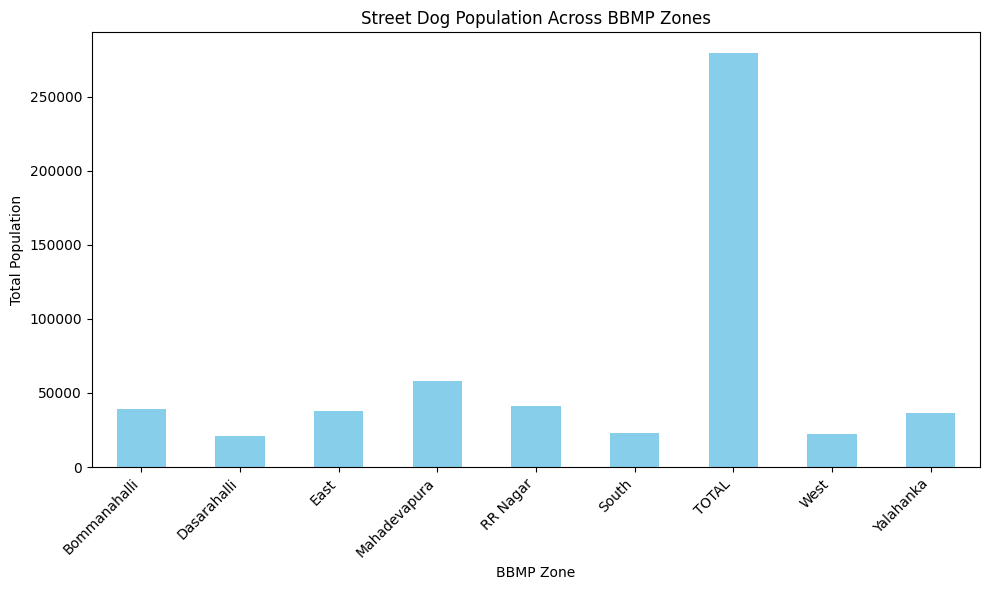

In [31]:
#pip install pandas matplotlib
import pandas as pd
import matplotlib.pyplot as plt
# Assuming your dataset has columns 'BBMP Zone' and 'Population'
# Group the data by BBMPZone and calculate the total population for each zone
total_population_by_zone = data.groupby('BBMP Zone')['Population'].sum()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
total_population_by_zone.plot(kind='bar', color='skyblue')
plt.title('Street Dog Population Across BBMP Zones')
plt.xlabel('BBMP Zone')
plt.ylabel('Total Population')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()


2. How does the gender distribution of street dogs vary across different areas? Can we represent this using a pie chart?


<ipython-input-39-d509cf4dc5ae>:16: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  gender_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, subplots=True, ax=axes)


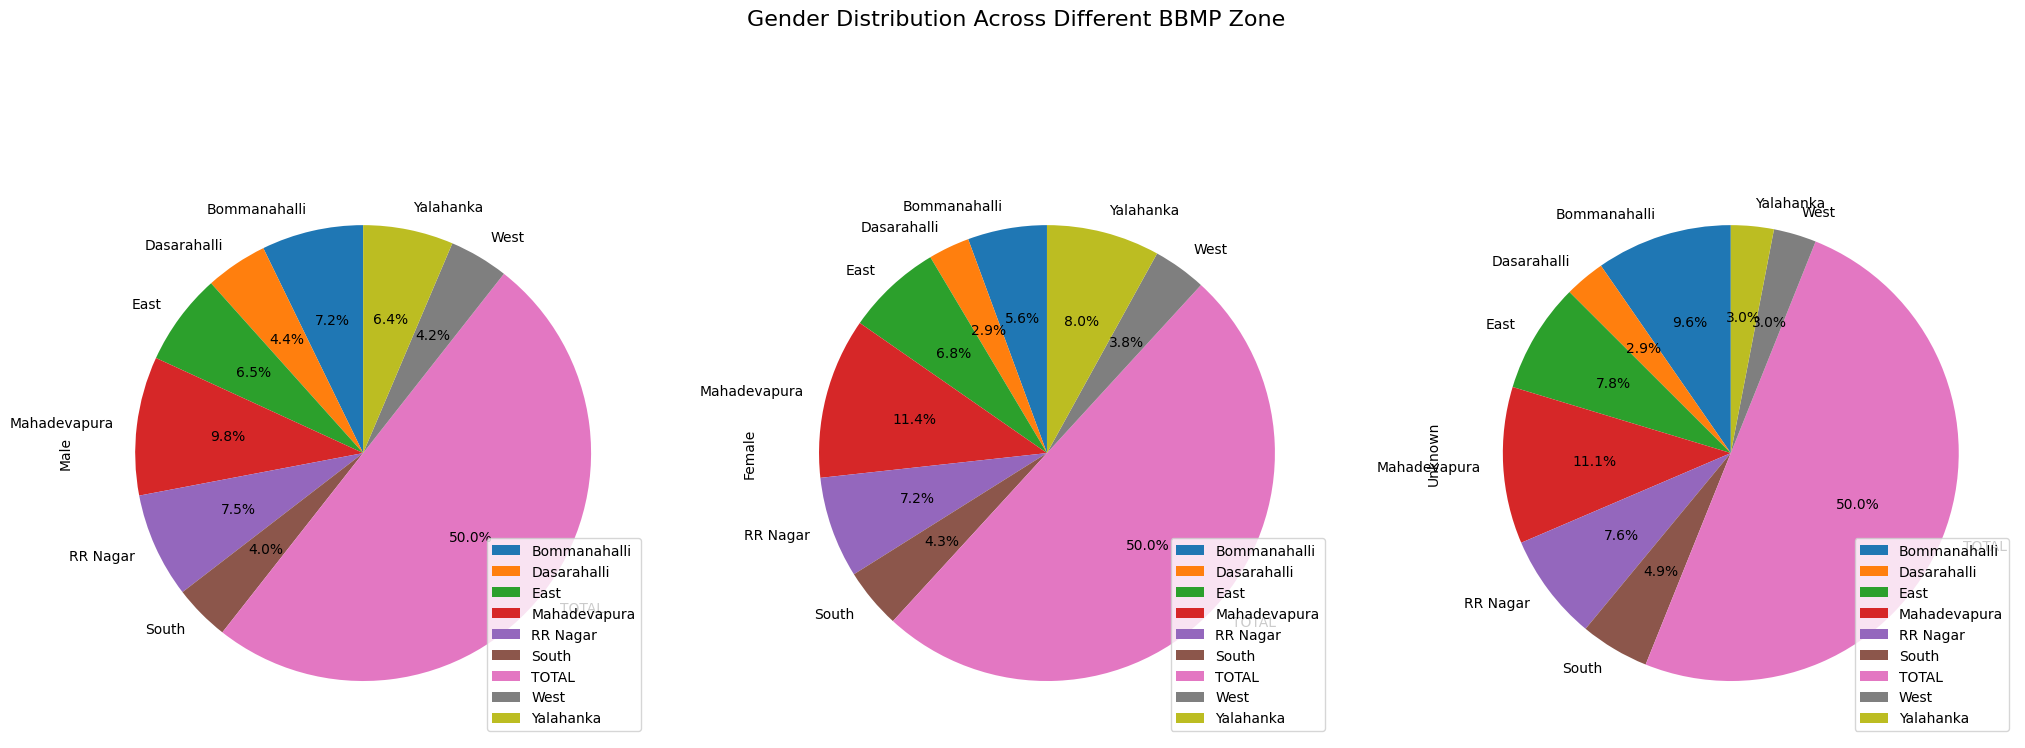

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataset has columns like 'BBMP Zone', 'Male', and 'Female'

# Create a new column for unknown gender if it's not present
df['Unknown'] = df['Population'] - df[['Male', 'Female']].sum(axis=1)

# Group by 'BBMP Zone' and sum the male, female, and unknown counts
gender_distribution = df.groupby('BBMP Zone')[['Male', 'Female', 'Unknown']].sum()

# Plot pie charts for each BBMP Zone
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(25, 8))

# Plot for each BBMP Zone
gender_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, subplots=True, ax=axes)

# Set a title
plt.suptitle('Gender Distribution Across Different BBMP Zone', y=1.05, fontsize=16)

plt.show()


 3.Is there a correlation between the population density and the number of street dogs per square kilometer? Can we plot this relationship using a scatter plot?


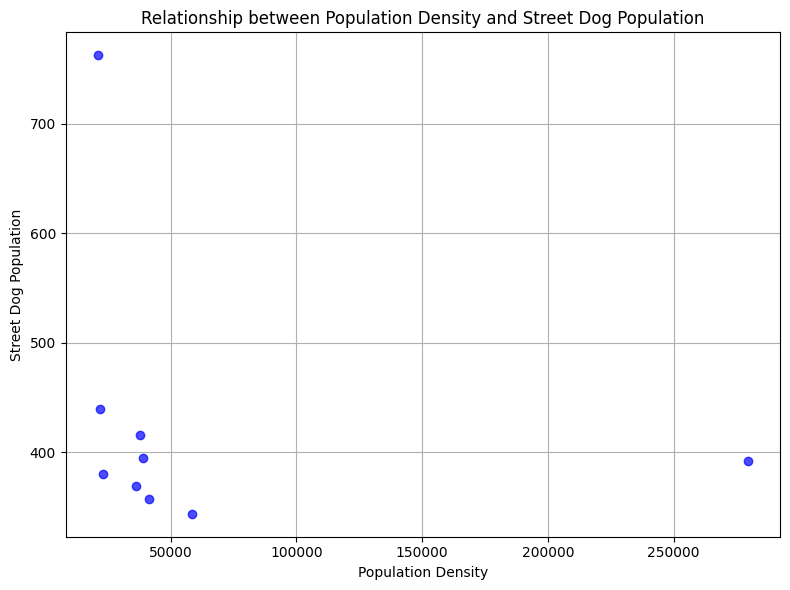

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
# Assuming your dataset has columns 'Population' and 'Dogs per sq. km'
population_density = data['Population']
street_dog_population = data['Dogs per sq. km']

# Drop NaN values if there are any
population_density = population_density.dropna()
street_dog_population = street_dog_population.dropna()

# Plotting the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(population_density, street_dog_population, color='blue', alpha=0.7)
plt.title('Relationship between Population Density and Street Dog Population')
plt.xlabel('Population Density')
plt.ylabel('Street Dog Population')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


4. Can we compare the neutering rates of male, female, and unknown street dogs using a grouped bar chart?


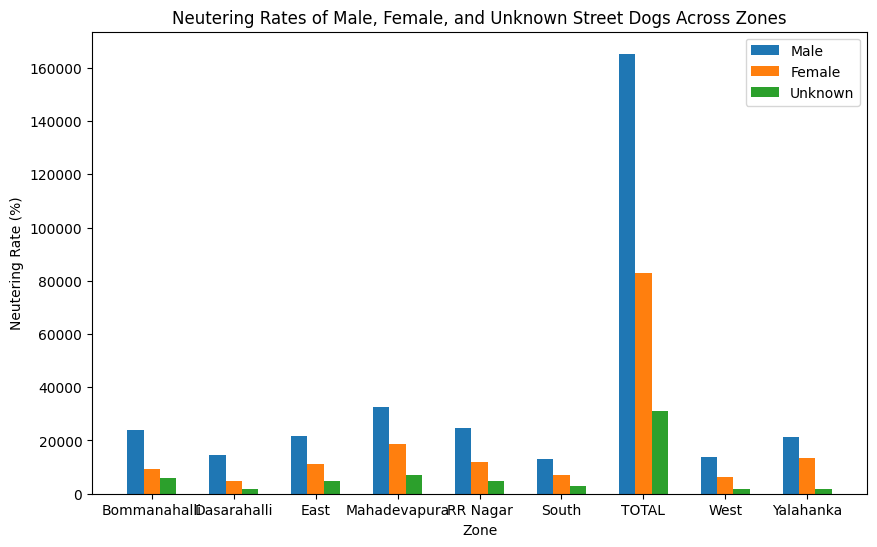

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Assuming your dataset has columns like 'Zone', 'Male', 'Female', 'Unknown', 'Neutered_Male', 'Neutered_Female', 'Neutered_Unknown'

# Calculate neutering rates
data['Male'] = data['Male'] / data['Male'] * 100
data['Female'] = data['Female'] / data['Female'] * 100
data['Unknown'] = data['Unknown'] / data['Unknown'] * 100

# Group by 'Zone' and calculate mean neutering rates
neutering_rates = df.groupby('BBMP Zone')[['Male', 'Female', 'Unknown']].mean()

# Plot a grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.2
bar_positions = np.arange(len(neutering_rates))

ax.bar(bar_positions - bar_width, neutering_rates['Male'], width=bar_width, label='Male')
ax.bar(bar_positions, neutering_rates['Female'], width=bar_width, label='Female')
ax.bar(bar_positions + bar_width, neutering_rates['Unknown'], width=bar_width, label='Unknown')

# Add labels and title
ax.set_xticks(bar_positions)
ax.set_xticklabels(neutering_rates.index)
ax.set_xlabel('Zone')
ax.set_ylabel('Neutering Rate (%)')
ax.set_title('Neutering Rates of Male, Female, and Unknown Street Dogs Across Zones')
ax.legend()

plt.show()


5. How does the number of street dogs per square kilometer vary across different areas? Can we represent this using a line graph?

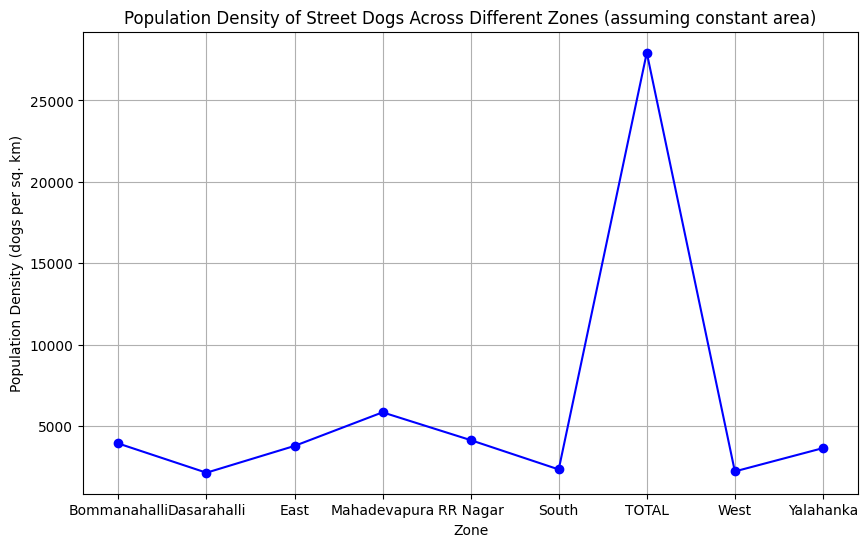

In [47]:
# Assume a constant area for each observation
constant_area = 10  # Replace with your chosen constant area

# Calculate population density
df['Population_Density'] = df['Population'] / constant_area

# Group by 'Zone' and calculate the mean population density
population_density_by_zone = df.groupby('BBMP Zone')['Population_Density'].mean()

# Plot a line graph
fig, ax = plt.subplots(figsize=(10, 6))

population_density_by_zone.plot(marker='o', linestyle='-', color='b', ax=ax)

# Add labels and title
ax.set_xlabel('Zone')
ax.set_ylabel('Population Density (dogs per sq. km)')
ax.set_title('Population Density of Street Dogs Across Different Zones (assuming constant area)')

plt.grid(True)
plt.show()


#TESTING STATICS:
1.Can we use a t-test to compare the mean population of street dogs in different areas of the city?


In [48]:
import pandas as pd
from scipy.stats import ttest_ind
# Assuming your dataset has columns like 'Zone', 'Population'
# Separate the populations by different areas (zones)
population_zone1 = df[df['BBMP Zone'] == 'Zone1']['Population']
population_zone2 = df[df['BBMP Zone'] == 'Zone2']['Population']
population_zone3 = df[df['BBMP Zone'] == 'Zone3']['Population']

# Perform a t-test between pairs of zones
t_statistic, p_value_zone1_zone2 = ttest_ind(population_zone1, population_zone2)
t_statistic, p_value_zone1_zone3 = ttest_ind(population_zone1, population_zone3)
t_statistic, p_value_zone2_zone3 = ttest_ind(population_zone2, population_zone3)

# Display the results
print("T-Test Results:")
print("Zone1 vs. Zone2 - P-value:", p_value_zone1_zone2)
print("Zone1 vs. Zone3 - P-value:", p_value_zone1_zone3)
print("Zone2 vs. Zone3 - P-value:", p_value_zone2_zone3)

# Check for statistical significance
alpha = 0.05
if any(p_value < alpha for p_value in [p_value_zone1_zone2, p_value_zone1_zone3, p_value_zone2_zone3]):
    print("There is a significant difference in mean population between at least two zones.")
else:
    print("There is no significant difference in mean population between the zones.")


T-Test Results:
Zone1 vs. Zone2 - P-value: nan
Zone1 vs. Zone3 - P-value: nan
Zone2 vs. Zone3 - P-value: nan
There is no significant difference in mean population between the zones.


2. How can we apply an F-test to determine if there is a significant difference in the neutering rates across different zones in the dataset?

In [49]:
import pandas as pd
from scipy.stats import f_oneway
# Assuming your dataset has columns 'BBMP Zone', 'Neutered (%)', and 'Population'
neutered_data = data[data['Neutered (%)'] == True]

# Group the data by BBM PZone and extract the population for each zone
zones = data['BBMP Zone'].unique()
grouped_data = [neutered_data[neutered_data['BBMP Zone'] == zone]['Population'] for zone in zones]

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(*grouped_data)

# Print the results
print(f'F-statistic: {f_statistic}')
print(f'P-value: {p_value}')

# Check for significance (assuming a significance level of 0.05)
if p_value < 0.05:
	print('There is a significant difference in neutering rates across different zones.')
else:
	print('There is no significant difference in neutering rates across different zones.')


F-statistic: nan
P-value: nan
There is no significant difference in neutering rates across different zones.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4133: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


3. Is it possible to perform an ANOVA (Analysis of Variance) to analyze the relationship between the area size and the number of street dogs per square kilometer?


count         9.000000
mean      62071.111111
std       82318.776458
min       21221.000000
25%       23241.000000
50%       37685.000000
75%       41266.000000
max      279335.000000
Name: Population, dtype: float64


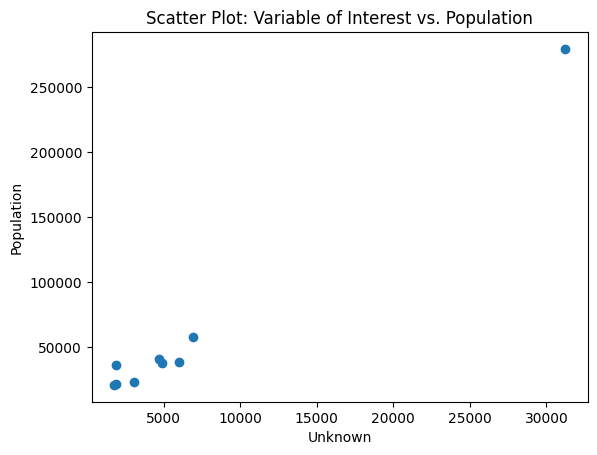

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataset has columns like 'Population' and another variable of interest

# Display descriptive statistics
population_stats = df['Population'].describe()
print(population_stats)

# Scatter plot for visualization
plt.scatter(df['Unknown'], df['Population'])
plt.xlabel('Unknown')
plt.ylabel('Population')
plt.title('Scatter Plot: Variable of Interest vs. Population')
plt.show()


4. Can we use a chi-square test to examine the association between the gender distribution of street dogs and the BBMP zones?


In [52]:
import pandas as pd
from scipy.stats import chi2_contingency
#Asuming your dataset has columns like 'Female', 'Male', and 'BBMP Zone'

# Combine 'Female' and 'Male' columns into a 'Gender' column
df['Gender'] = df[['Female', 'Male']].idxmax(axis=1)

# Create a contingency table
contingency_table = pd.crosstab(df['Gender'], df['BBMP Zone'])

# Display the contingency table
print("Contingency Table:")
print(contingency_table)

# Perform the chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("\nChi-square Test Results:")
print("Chi2 Statistic:", chi2_stat)
print("P-value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:")
print(expected)

# Check for statistical significance
alpha = 0.05
if p_value < alpha:
    print("\nThere is a significant association between the gender distribution of street dogs and the BBMP zones.")
else:
    print("\nThere is no significant association between the gender distribution of street dogs and the BBMP zones.")


Contingency Table:
BBMP Zone  Bommanahalli  Dasarahalli  East  Mahadevapura  RR Nagar  South  \
Gender                                                                      
Male                  1            1     1             1         1      1   

BBMP Zone  TOTAL  West  Yalahanka  
Gender                             
Male           1     1          1  

Chi-square Test Results:
Chi2 Statistic: 0.0
P-value: 1.0
Degrees of Freedom: 0
Expected Frequencies:
[[1. 1. 1. 1. 1. 1. 1. 1. 1.]]

There is no significant association between the gender distribution of street dogs and the BBMP zones.


5. How can we apply PCA (Principal Component Analysis) to identify the key variables that contribute to the overall variation in the street dog dataset?


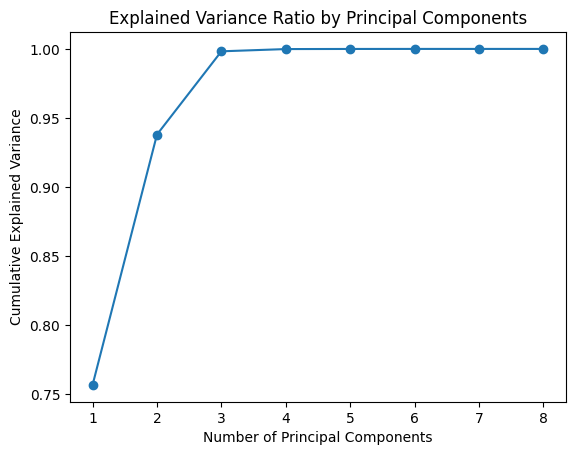

Principal Component Loadings:
                         PC1       PC2
Population          0.405215  0.061815
Male                0.404495  0.077831
Female              0.405390  0.032804
Unknown             0.403518  0.053768
Neutered (%)       -0.071672  0.711921
Area                0.406277  0.013535
Dogs per sq. km    -0.103054  0.689433
Population_Density  0.405215  0.061815


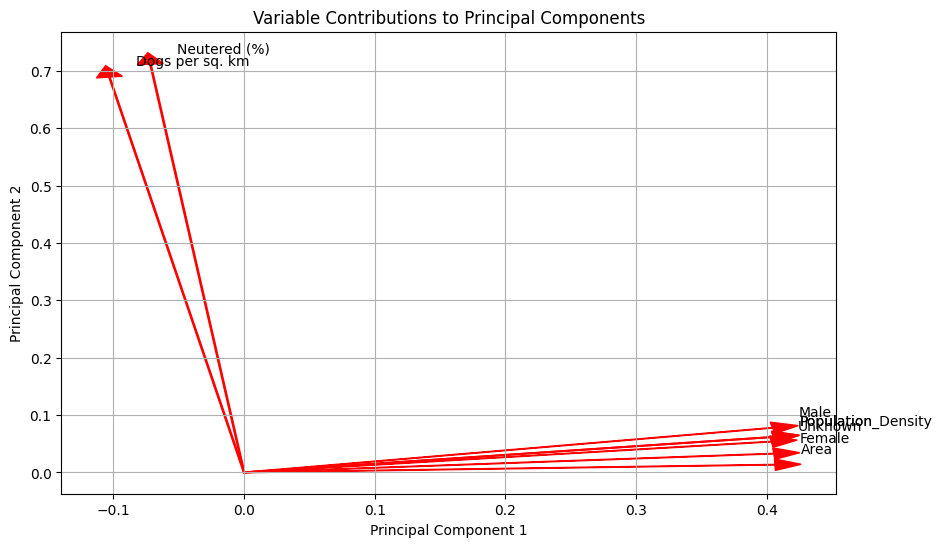

In [56]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
# Assuming your dataset has numerical columns that you want to include in PCA

# Extract numerical columns for PCA
numerical_columns = df.select_dtypes(include=['int', 'float']).columns
data_for_pca = df[numerical_columns]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_pca)

# Apply PCA
pca = PCA()
pca_result = pca.fit_transform(scaled_data)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the explained variance ratio
cumulative_explained_variance = explained_variance_ratio.cumsum()
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio by Principal Components')
plt.show()

# Identify the number of components to retain
num_components_to_retain = 0  # You need to choose a suitable threshold or inspect the plot
while cumulative_explained_variance[num_components_to_retain] < 0.95:
    num_components_to_retain += 1

# Apply PCA with the selected number of components
pca = PCA(n_components=num_components_to_retain)
final_pca_result = pca.fit_transform(scaled_data)

# Print the loadings (coefficients) of each variable on each principal component
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(num_components_to_retain)], index=numerical_columns)
print("Principal Component Loadings:")
print(loadings)

# Display the contribution of each original variable to the first two principal components
plt.figure(figsize=(10, 6))
for i, var in enumerate(numerical_columns):
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], head_width=0.02, head_length=0.02, fc='r', ec='r')
    plt.text(pca.components_[0, i] + 0.02, pca.components_[1, i] + 0.02, var)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Variable Contributions to Principal Components')
plt.grid()
plt.show()
